# Hometask №6 
## by Anton Kondrashov
##### HSE, CS, BSE 141(1)

In [53]:
# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse
import scipy as sp


## Optimization: GD vs SGD vs mini-batch SGD

In [161]:
#1
def activation(x):
    return 1.0 / (1 + np.exp(-x))
 
def GD(X, y, max_epoch = 1000, alpha = 0.1, gamma = 0, beta = 0, tol = 0.1):
    
    #init
    W = np.random.uniform(size=(X.shape[1],))
    lossHistory = []
    
    for epoch in xrange(max_epoch):
        
        preds = activation(X.dot(W))
        error = preds - y
        
        L1 = sum(abs(W))
        L2 = sum(pow(W, 2))
        
        L = np.sum(np.log(1 + np.exp(np.sum((-W * X), axis=1)*y)))
        loss = L + gamma * L1 + beta * L2
        
        lossHistory.append(loss)
        gradient = X.T.dot(error) / X.shape[0]
        
        diff = -alpha * gradient
        
        if np.sum(abs(diff)) < tol:
            print('Tolerance break')
            break
        
        W += diff
        
    return W, lossHistory
    
def next_batch(X, y, batchSize):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

def SGD(X, y, batch_size = 1, max_epoch = 1000, alpha = 0.1, gamma = 0, beta = 0):
    
    #init
    W = np.random.uniform(size=(X.shape[1],))
    lossHistory = []
    
    #train
    for epoch in xrange(max_epoch):
        
        epochLoss = []
        
        for (batchX, batchY) in next_batch(X, y, batch_size):
            
            preds = activation(batchX.dot(W))
            error = preds - batchY
            
            L1 = sum(abs(W))
            L2 = sum(pow(W, 2))
            
            L = np.sum(np.log(1 + np.exp(np.sum((-W * batchX), axis=1)*batchY)))
            loss = L + gamma * L1 + beta * L2
            
            epochLoss.append(loss)
            gradient = batchX.T.dot(error) / batchX.shape[0]
            W += -alpha * gradient
            
        lossHistory.append(np.average(epochLoss))
    return W, lossHistory

In [162]:
def with_constant_feature(X):
    return np.c_[np.ones((X.shape[0])), X]

In [186]:
def show(X, y, L):
    plt.figure()
    plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
    plt.plot(X, Y, "r-")

    fig = plt.figure()
    plt.plot(np.arange(0, len(L)), L)
    fig.suptitle("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

Tolerance break


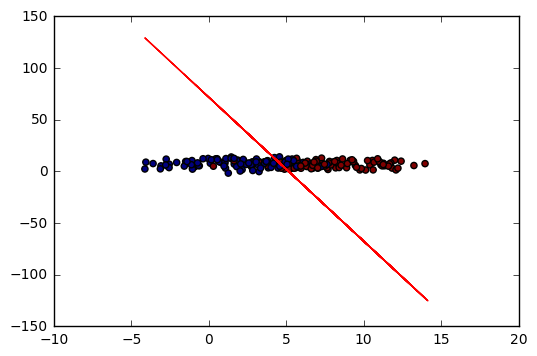

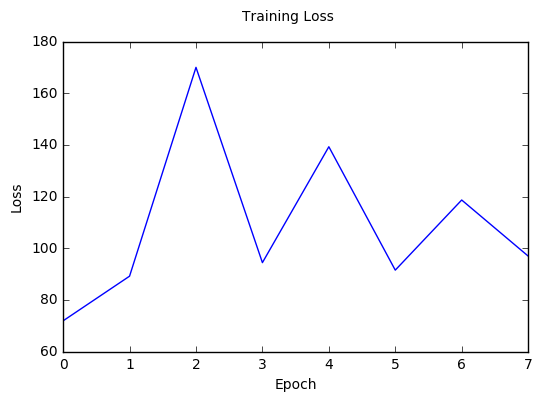

In [193]:
#GD
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=3, random_state=20)
X = with_constant_feature(X)
W,l = GD(X,y)
show(X, y, l)

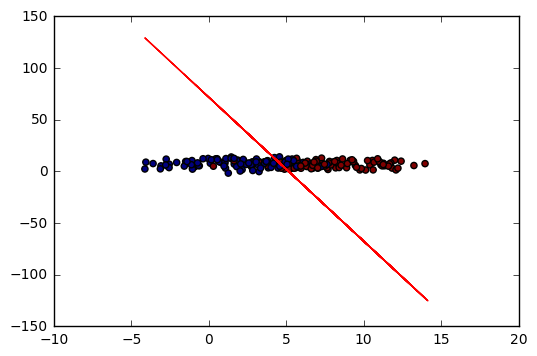

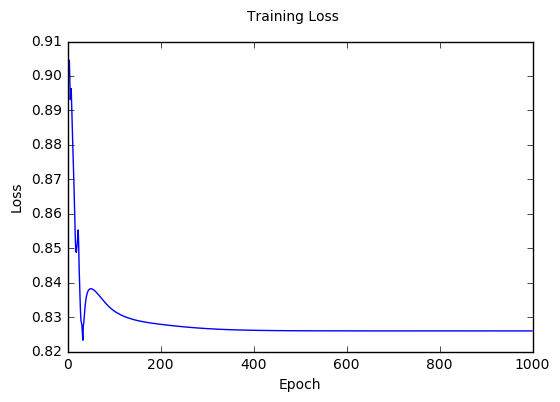

In [194]:
#SGD
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=3, random_state=20)
X = with_constant_feature(X)
W,l = SGD(X,y)
show(X, y, l)

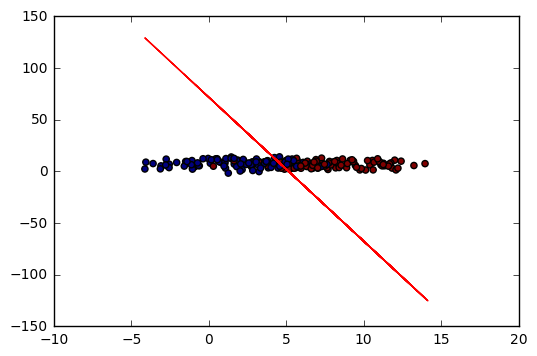

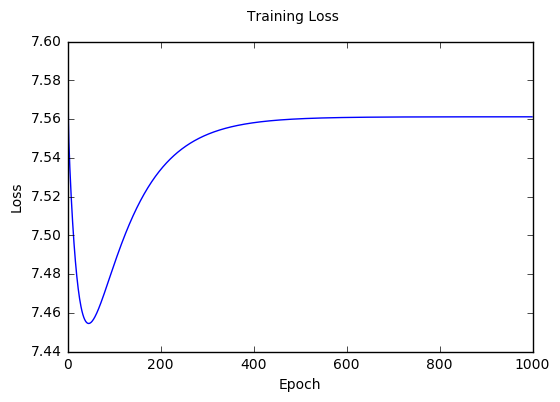

In [196]:
#mini-batch SGD
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=3, random_state=20)
X = with_constant_feature(X)
W,l = SGD(X,y, batch_size=15)
show(X, y, l)

## Regularization

In [211]:
import pickle
import pandas as pd
from sklearn import preprocessing, metrics

In [212]:
data = pd.read_pickle('first_dataset.pkl')

In [213]:
X, y, X_test, y_test = data['train_data'], data['train_labels'], data['test_data'], data['test_labels']

In [214]:
#standardize and add a constant feature
standard = preprocessing.StandardScaler()

X = with_constant_feature(standard.fit_transform(X, y))
X_test = with_constant_feature(standard.transform(X_test))

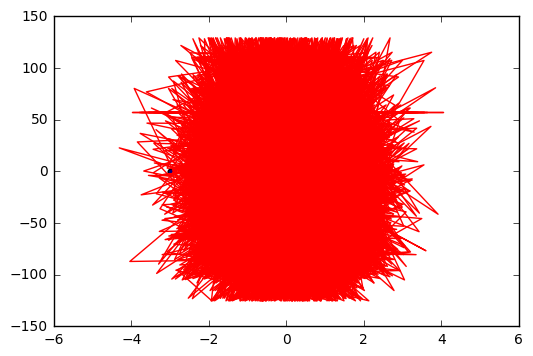

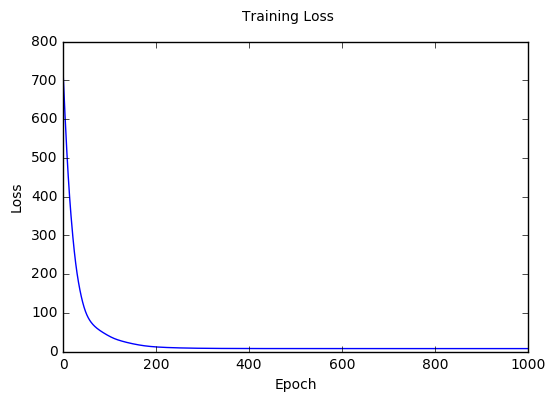

In [215]:
# no reg
w, L = GD(X, y)
show(X,y,L)

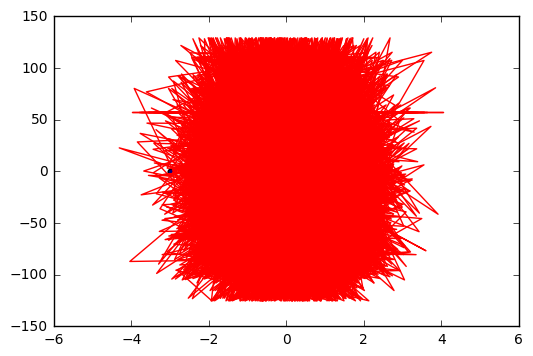

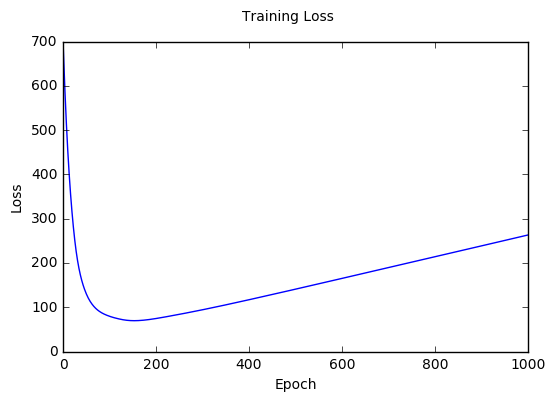

In [216]:
# only L1
w, L = GD(X, y, gamma=0.25)
show(X,y,L)

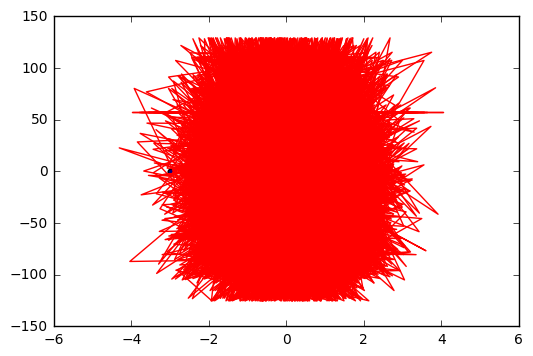

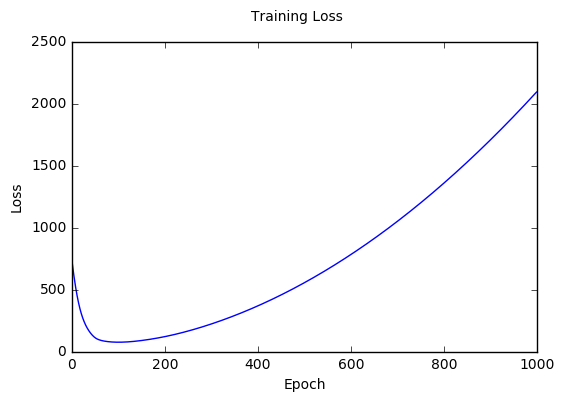

In [217]:
# only L2
w, L = GD(X, y, beta=0.25)
show(X,y,L)

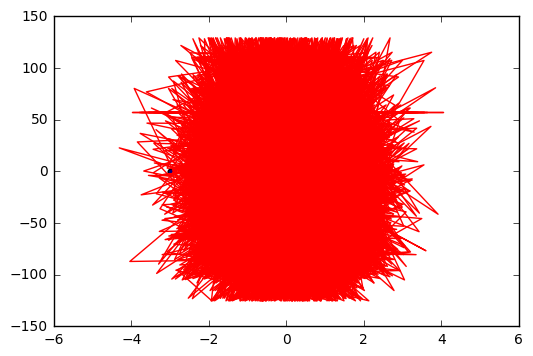

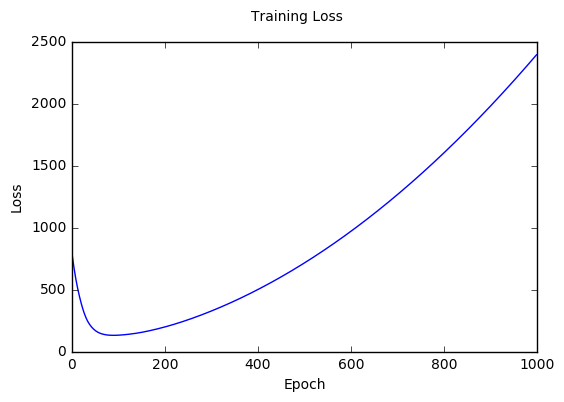

In [218]:
# both L1 and L2
w, L = GD(X, y, beta=0.25, gamma=0.25)
show(X,y,L)

## 2. Compare the results of the methods on the train and test data, explain the difference.

In [220]:
w, L = GD(X, y)
print(np.sort(w)[-2:])
w, L = GD(X, y, gamma=0.5)
print(np.sort(w)[-2:])

[  8.06377443  31.79743548]
[  8.11167674  31.62866649]


## Model evaluation

In [221]:
data = pd.read_pickle('diabetes.pkl')

In [222]:
X, y = data['data'], data['labels']

In [223]:
standard = preprocessing.StandardScaler()
X_data = with_constant_feature(standard.fit_transform(X, y))

In [226]:
w, L = SGD(X, y, alpha = 0.1, gamma = 0.2)

In [227]:
def prediction(w, X, a):
    return [np.sign((np.dot(w, obj)) - a) for obj in X]

In [228]:
matrix = metrics.confusion_matrix(y, prediction(w, X, 0.5))
print(matrix)

[[500   0]
 [268   0]]
